# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import imblearn
from sklearn.ensemble import RandomForestClassifier
import time

# Importing Dataset

In [ ]:
wine=pd.read_csv("QualityPrediction.csv")
print(wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# EDA

In [ ]:
print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [ ]:
print(wine.shape)
print(wine.size)

(1599, 12)
19188


In [ ]:
#Checking null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: fixed acidity, dtype: int64


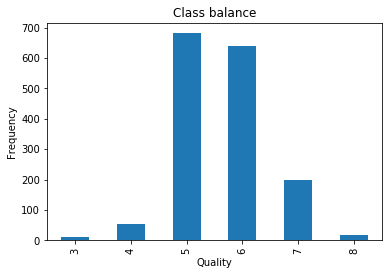

In [ ]:
#Visualising the balance in classes

freq=wine.groupby(by='quality').count()
f=freq['fixed acidity']
print(f)
f.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Quality')
plt.title('Class balance')
plt.show()

#Highly imbalanced dataset,so performing over sampling

In [ ]:
#Extracting target variable and predictor variables
X=wine.iloc[:,:-1]
Y=wine.iloc[:,-1]
print(X)
print()
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

# Splitting the dataset into test and train data

In [ ]:
#Splitting dataset before re-sampling

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

# Oversampling using SMOTE

In [ ]:
# #Oversampling with SMOTE 
# from imblearn.over_sampling import SMOTE
#strategy={3:500,4:500,7:500,8:500}
# #Resampling minority classes
# sm=SMOTE(sampling_strategy='not majority',random_state=7)  #not majority- resample all classes but the majority class

# #Fit the model
# x_train,y_train = sm.fit_sample(x_train,y_train)
# over_train = pd.concat([pd.DataFrame(x_train),pd.DataFrame(y_train)], axis=1 )
# print(over_train.shape)
# print()
# from collections import Counter
# counter = Counter(y_train)
# for k,v in counter.items():
#     per = v / len(y_train) * 100
#     print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# plt.bar(counter.keys(), counter.values())
# plt.show()

# Oversampling is not included since the accuracy decreased

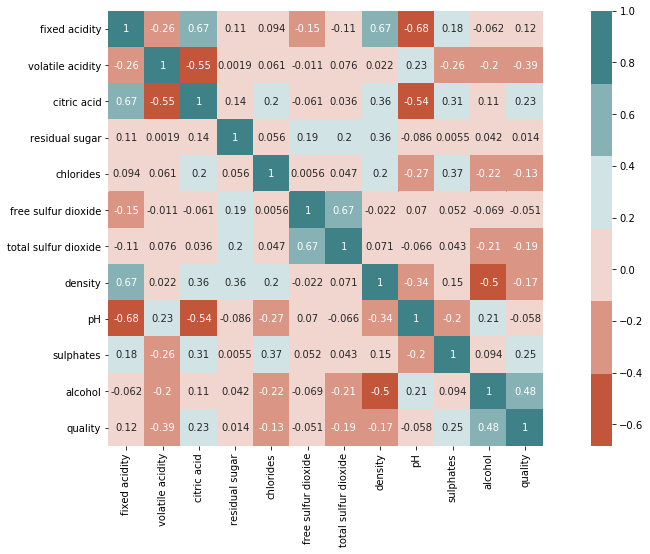

In [ ]:
#Checking correlation before balancing
plt.figure(figsize=(17,8))
sns.heatmap(wine.corr(),square=True,annot=True,cmap=sns.diverging_palette(20,200),)
plt.show()

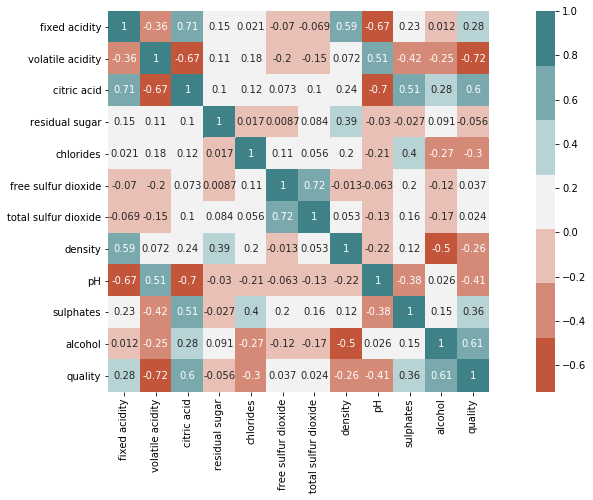

In [ ]:
#After balancing classes
plt.figure(figsize=(17,7))
sns.heatmap(over_train.corr(),square=True,annot=True,cmap=sns.diverging_palette(20,200,n=7))
plt.show()

# Dropping column with high correlation

In [ ]:
x_train=x_train.drop(['total sulfur dioxide'],axis=1)
print(x_train.columns)
x_test=x_test.drop(['total sulfur dioxide'],axis=1)
print(x_test.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')


# Checking Outliers and treating them

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     906.000000        906.000000   906.000000      906.000000   
mean        8.203091          0.527213     0.249669        2.180243   
std         1.469848          0.166488     0.179120        0.439389   
min         5.100000          0.120000     0.000000        1.200000   
25%         7.200000          0.400000     0.090000        1.900000   
50%         7.850000          0.530000     0.240000        2.100000   
75%         9.000000          0.630000     0.390000        2.400000   
max        12.400000          1.005000     0.730000        3.600000   

        chlorides  free sulfur dioxide     density          pH   sulphates  \
count  906.000000           906.000000  906.000000  906.000000  906.000000   
mean     0.078361            15.379691    0.996597    3.319912    0.628631   
std      0.014300             8.940527    0.001586    0.131858    0.114459   
min      0.041000             1.000000    0.9923

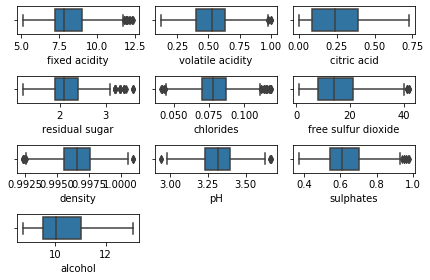

In [ ]:
print(x_train.describe())
column_list=x_train.columns.values
for i in range(0,len(column_list)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x_train[column_list[i]])
    plt.tight_layout()

In [ ]:
#Using IQR method to detect the threshold and removing outliers
Q1=x_train.quantile(0.25)
Q3=x_train.quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
print()
print(lower)
print()
print(upper)
x_train=x_train[((x_train<upper)&(x_train>lower)).all(axis=1)]
len(x_train)

fixed acidity           2.150000
volatile acidity        0.245000
citric acid             0.330000
residual sugar          0.700000
chlorides               0.020000
free sulfur dioxide    14.000000
density                 0.002225
pH                      0.190000
sulphates               0.180000
alcohol                 1.500000
dtype: float64

fixed acidity           3.875000
volatile acidity        0.027500
citric acid            -0.405000
residual sugar          0.850000
chlorides               0.040000
free sulfur dioxide   -13.000000
density                 0.992283
pH                      2.925000
sulphates               0.280000
alcohol                 7.250000
dtype: float64

fixed acidity          12.475000
volatile acidity        1.007500
citric acid             0.915000
residual sugar          3.650000
chlorides               0.120000
free sulfur dioxide    43.000000
density                 1.001182
pH                      3.685000
sulphates               1.000000
alcohol    

906

In [ ]:
#Extracting the entries of output class that of the input

y_train=y_train[x_train.index]

# Random Forest

In [ ]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=0)#,class_weight='balanced')

In [ ]:
#Hyperparameter tuning
np.random.seed(0)
start = time.time()

param_dist = {'max_depth': [2, 4,6],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}
Time taken in grid search:  94.59


In [ ]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion='gini', max_depth= 6, max_features= 'auto')

RandomForestClassifier(max_depth=6, random_state=0)

# OOB Rate

In [ ]:
fit_rf.set_params(oob_score=True)

min_estimators = 15
max_estimators = 800

error_rate = {} 

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)
    oob_error = 1 - fit_rf.oob_score_ 
    error_rate[i] = oob_error

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
print(oob_series)

15     0.396247
16     0.390728
17     0.385210
18     0.389625
19     0.385210
         ...   
796    0.357616
797    0.357616
798    0.359823
799    0.359823
800    0.359823
Length: 786, dtype: float64


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes')

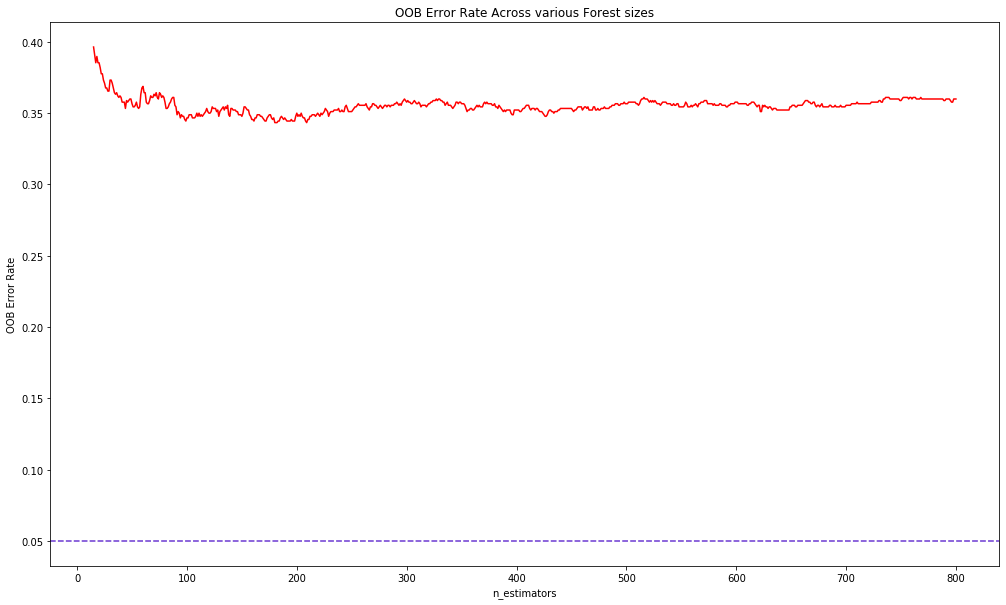

In [ ]:
fig, ax = plt.subplots(figsize=(17, 10))
oob_series.plot(kind='line',color = 'red')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes')

In [ ]:
print('OOB Error rate for 700 trees is: {0:.5f}'.format(oob_series[700]))
print('OOB Error rate for 600 trees is: {0:.5f}'.format(oob_series[600]))
print('OOB Error rate for 800 trees is: {0:.5f}'.format(oob_series[800]))
print('OOB Error rate for 200 trees is: {0:.5f}'.format(oob_series[200]))
print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[300]))
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[400]))
print('OOB Error rate for 500 trees is: {0:.5f}'.format(oob_series[500]))

OOB Error rate for 700 trees is: 0.35541
OOB Error rate for 600 trees is: 0.35762
OOB Error rate for 800 trees is: 0.35982
OOB Error rate for 200 trees is: 0.34989
OOB Error rate for 300 trees is: 0.35762
OOB Error rate for 400 trees is: 0.35210
OOB Error rate for 500 trees is: 0.35651


In [ ]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=300,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=6, n_estimators=300, random_state=0)

In [ ]:
#Training the model
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=300, random_state=0)

In [ ]:
#Evaluation Metrics :
y_pred = fit_rf.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ',acc)
precision=metrics.precision_score(y_test,y_pred,average='weighted') #weighted-takes into account label imbalance
print('Precision: ',precision)
recall=metrics.recall_score(y_test,y_pred,average='weighted') #weighted-takes into account label imbalance
print('Recall : ',recall)
f1=metrics.f1_score(y_test,y_pred,average='weighted') #weighted-takes into account label imbalance
print('F1 score: ',f1)

print('Training Score',fit_rf.score(x_train,y_train))

print('Testing Score',fit_rf.score(x_test,y_test))

Accuracy:  0.6375
Precision:  0.5995561331877384
Recall :  0.6375
F1 score:  0.6171789330344304
Training Score 0.8002207505518764
Testing Score 0.6375


C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
